In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite
import string
import pandas as pd

In [2]:
children1 = ['Set Theory', 'Category Theory', 
            'Real/Functional Analysis', 'Complex Analysis', 'Harmonic Analysis', 'PDE', 'Numerical Analysis', 
            'Rings and Algebra', 'Group Theory',  'Representation Theory',
            'Analytic Number Theory', 'Algebraic Number Theory',
            'Combinatorics', 'Graph Theory',
            'General Topology', 'Geometric Topology', 'Algebraic Topology', 'Algebraic Geometry', 'Differential Geometry',
            'Probability', 'Statistics',
            'Computer Algebra', 'Data Science', 'Cryptography/Coding theory', 'Mathematical Modeling',
            'Classical Mechanics', 'Complex/Dynamical Systems', 'Quantum Theory', 'Relativity and Quantum Relativistic Theories', 'Statistical Mechanics'
           ]


## Read data

In [3]:
mentors = pd.read_excel('/Users/bengieru/Desktop/DRP_turkey/uzeyir/data_.xlsx', sheet_name = 'Mentors')
mentees = pd.read_excel('/Users/bengieru/Desktop/DRP_turkey/uzeyir/data_.xlsx', sheet_name = 'Mentees')

In [4]:
#split mentor areas ignoring the ordering. Areas need to be \n (return) seperated without blanks in the excel sheet
mentor_areas = []
mentor_area_counts = []
for i, areas in enumerate(mentors['Mentor Areas']):
    temp_area = areas.split('\n')
    for area in temp_area:
        mentor_areas.append(area) # append all areas in one list
        mentor_area_counts.append(children1.index(area)) #find the index of the area in children1 to display the distribution
        
#do the same for mentees
mentee_areas = []
mentee_area_counts = []
for i, areas in enumerate(mentees['Mentee Areas']):
    temp_area = areas.split('\n')
    for area in temp_area:
        mentee_areas.append(area)
        mentee_area_counts.append(children1.index(area))

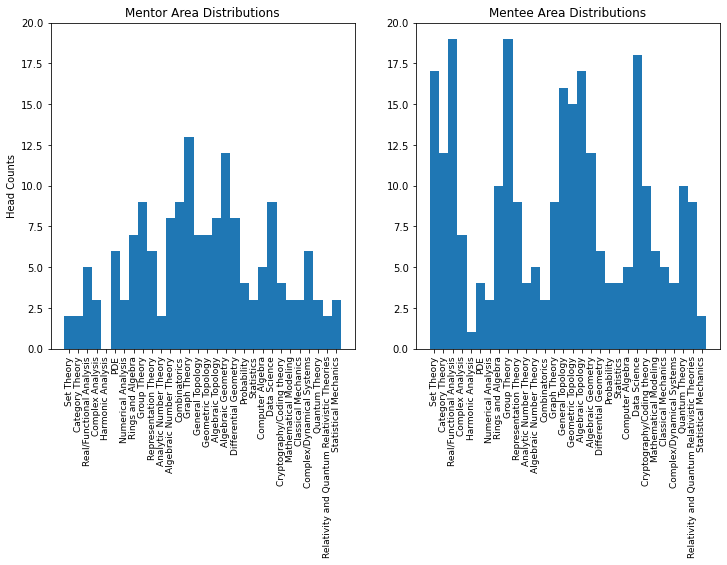

In [5]:
fig, ax = plt.subplots(1,2,figsize = (12,6))
dist_mentor, bins, patches = ax[0].hist(mentor_area_counts, bins = np.arange(0, len(children1)+1))
ax[0].set_title('Mentor Area Distributions', fontsize = 12)
ax[0].set_xticks(np.arange(0,len(children1))+0.5)
ax[0].set_xticklabels(children1, rotation='vertical', fontsize = 9)
ax[0].set_ylim(0,20)
ax[0].set_ylabel('Head Counts')

dist_mentee, bins, patches = ax[1].hist(mentee_area_counts, bins = np.arange(0, len(children1)+1))
ax[1].set_title('Mentee Area Distributions', fontsize = 12)
ax[1].set_xticks(np.arange(0,len(children1))+0.5)
ax[1].set_xticklabels(children1, rotation='vertical', fontsize = 9)
ax[1].set_ylim(0,20)
plt.show()

## Create random selections drawn from the same probability distribution as the real-data

In [6]:
# below numbers are in accordance with DRP Turkey 2022 applications. In order to generate a larger test dataset, simply change these values.
n_mentors = 46 # number of mentors
k_mentors = 4 # number of mentor selections
n_mentees = 90 # number of mentees
k_mentees = 3 # number of mentee selections

mentor_selections = []#[[] for i in range(n_mentors)]
for i in range(n_mentors):
    choice = np.random.choice(children1, k_mentors, replace = False, p = dist_mentor/len(mentor_area_counts))
    for area in choice:
        mentor_selections.append(area)
    
mentee_selections = []#[[] for i in range(n_mentees)]
for i in range(n_mentees):
    choice = np.random.choice(children1, k_mentees, replace = False, p = dist_mentee/len(mentee_area_counts))
    for area in choice:
        mentee_selections.append(area)

In [7]:
#split mentor areas ignoring the ordering. Areas need to be comma seperated without blanks in the excel sheet
mentor_area_counts_test = []
for i, area in enumerate(mentor_selections):
    mentor_area_counts_test.append(children1.index(area))
        
#do the same for mentees
mentee_area_counts_test = []
for i, area in enumerate(mentee_selections):
    mentee_area_counts_test.append(children1.index(area))

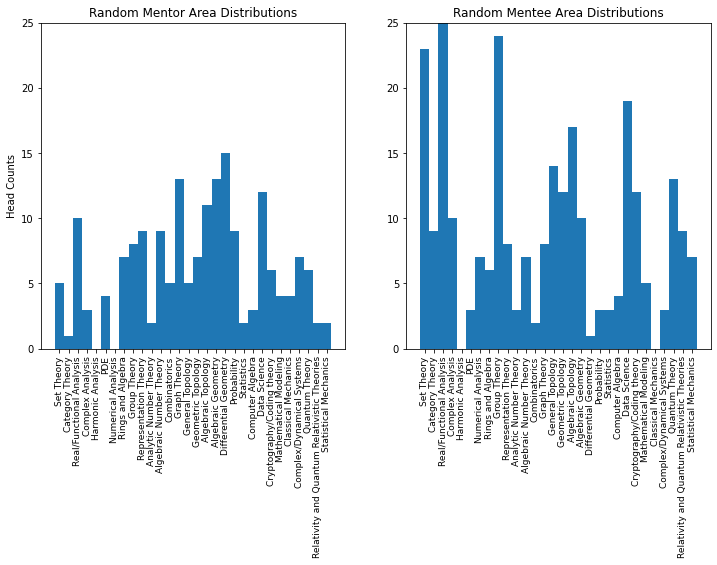

In [8]:
fig, ax = plt.subplots(1,2,figsize = (12,6))
dist_mentor, bins, patches = ax[0].hist(mentor_area_counts_test, bins = np.arange(0, len(children1)+1))
ax[0].set_title('Random Mentor Area Distributions', fontsize = 12)
ax[0].set_xticks(np.arange(0,len(children1))+0.5)
ax[0].set_xticklabels(children1, rotation='vertical', fontsize = 9)
ax[0].set_ylim(0,25)
ax[0].set_ylabel('Head Counts')

dist_mentee, bins, patches = ax[1].hist(mentee_area_counts_test, bins = np.arange(0, len(children1)+1))
ax[1].set_title('Random Mentee Area Distributions', fontsize = 12)
ax[1].set_xticks(np.arange(0,len(children1))+0.5)
ax[1].set_xticklabels(children1, rotation='vertical', fontsize = 9)
ax[1].set_ylim(0,25)
plt.show()